# Finding Nemo App
Image recognition is an easy task for humans, a difficult one for computers. The purpose of this demo is to clarify how neural networks solve this problem. 


## Initial Settings

In [1]:
%matplotlib inline

# PROBLEM DEFINITION
# -*- coding: utf-8 -*-

model_name='nemo_best.model'

classes = {                                            # Options: 'nemo', 'dory'
0: 'nemo',                                             # 'rock', 'scissors', 'paper'
1: 'dory',
}
epoch_nr=30

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pathlib
import skimage
import skimage.transform
import skimage.viewer
import numpy as np
import keras
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils  import np_utils
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython import display 
import time
import cv2
import matplotlib.gridspec as gridspec
from keras import backend as K

C:\Users\Fabrizio\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
Using TensorFlow backend.


## 1. The Training Set

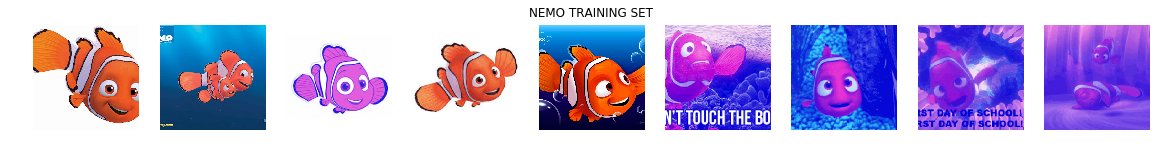

DESIRED CLASS:  [1, 0]


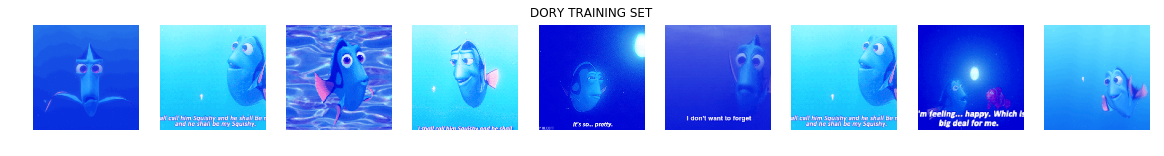

DESIRED CLASS:  [0, 1]


In [2]:
# I. LOAD AND PREPROCESS IMAGES

#Scegli le immagini
im_high, im, imv_high, imv = [], [], [], []           # images (training and validation)

nc=len(classes)                                       # Number of classes

folder, path, pathv = [0]*nc, [0]*nc, [0]*nc          # Path of Images

for i in range(nc):
    folder[i] = classes[i]+"_test"
    path[i]=(pathlib.Path(".")/classes[i]).glob("*.*")        # training
    pathv[i]=(pathlib.Path(".")/folder[i]).glob("*.*")  # validation
    

tn =[0]*nc                                            # number of images t
vn=[0]*nc                                             # number of images v

def square(im):
    h, w = im.shape[0:2]
    sz = min(h, w)
    im=im[(h//2-sz//2):(h//2+sz//2),(w//2-sz//2):(w//2+sz//2),:] 
    return im

def resize(im, size):
    im = skimage.transform.resize(im, (size, size, 3), mode='reflect')
    return im

for i in range(nc):
    for j, p in enumerate(path[i]):
        p1=skimage.io.imread(p)
        p1 = square(p1)
        p1 = resize(p1, 550)
        im_high.append(p1)
        p1 = resize(p1, 64)
        im.append(p1)
        tn[i] = (j+1)
    for k, q in enumerate(pathv[i]):
        q1=skimage.io.imread(q)
        q1 = square(q1)
        q1 = resize(q1, 550)
        imv_high.append(q1)
        q1 = resize(q1, 64)
        imv.append(q1)
        vn[i] = k+1

X1 = np.asarray(im, dtype='float32')                                      # numpy image
X2 = np.asarray(imv, dtype='float32')                                     # numpy image

# INDICATE THE DESIRED OUTPUTS

output, outputv = [0]*nc, [0]*nc
output2, outputv2 = [], []
for i in range(nc):
    output[i] = [[0]*nc for k in range(tn[i])]
    outputv[i] = [[0]*nc for k in range(vn[i])]
    for j in range(tn[i]):
        output[i][j][i] = 1
    for l in range(vn[i]):
        outputv[i][l][i] = 1
    output2 += output[i]
    outputv2 += outputv[i]

Y1 = np.asarray(output2, dtype='float32')
Y2 = np.asarray(outputv2, dtype='float32')

# Plot

pnr=9
def plotTraining(n):
    x=0
    for i in range(nc):
        fig = plt.figure(figsize=(20,2))
        plt.title('%s TRAINING SET' %classes[i].upper(), loc='center')
        plt.axis('off')
        for j in range(n):
            sp=fig.add_subplot(1,n,j+1)
            sp.axis('off')
            plt.imshow(np.asarray(im_high[x+j]))
        x+=tn[i]
        plt.show()
        print ("DESIRED CLASS: ", output[i][0])

plotTraining(pnr)

In [3]:
# DATA AUGMENTATION OPTIONS

datagen = ImageDataGenerator(                             # best performance: hf=True, rotr=360, zoomr=0.6, 1.1
    horizontal_flip=True,
    rotation_range= 360,
    zoom_range=(0.6, 1.1))


## 2. Creating a Neural Network

In [4]:
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='valid', input_shape=(64,64,3))) # 3 perchè rgb
model.add(Activation('relu'))
model.add(Conv2D(3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())  #  
model.add(Dense(128)) # generate a fully connected layer with 128 outputs (arbitrario)
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nc)) # output layer
model.add(Activation('softmax')) # output activation per renderle probabilità
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print("Number of parameters: ")
#print (model.count_params())
print (model.summary())
def plotModel():
#    plot_model(model, to_file='model.png', show_shapes=True)
    graph=skimage.io.imread('model.gif')
    plt.figure(figsize=(20,20))
    plt.imshow(graph)
    plt.title('NEURAL NETWORK SCHEME', loc='center')
    plt.axis('off')
    plt.show()

#plotModel()
(pathlib.Path(".")/"logs").mkdir(exist_ok=True)

load = True
if  load == False:
    model.fit_generator(datagen.flow(X1, Y1), steps_per_epoch=30, validation_data=(X2, Y2), epochs=epoch_nr, verbose=1, callbacks=[keras.callbacks.TensorBoard(log_dir='./logs/'+time.strftime("%Y%m%d%H%M%S"))])    

else:
    model.load_weights("nemo2") 


                                                   # Best performance: batchsize 32, steps=30, epochs=30
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 3)         84        
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         84        
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 3)         84        
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 3)         0         
__________

## 3. Testing the Neural Network

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


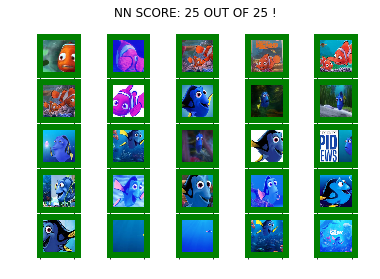

In [5]:
# III. TESTALA SUL VALIDATION SET


scores = model.predict(np.asarray(imv))
a = scores.tolist()
b = [0] * len(a)
for i in range(len(b)):
    b[i] = a[i].index(max(a[i]))
print (b)
x1=5
y1=5
lw=6

correct=0
for i in range(x1*y1):
    if outputv2[i][b[i]]==1:
        correct+=1

def plotValResults():
    imageoption= True
    fig = plt.figure()
    plt.title('NN SCORE: %d OUT OF %d ! \n' %(correct, x1*y1), loc='center')
    plt.axis('off')    
    c1='g'
    c2='r'
    c=c1
    fail=0
    perfect=True
    for i in range(x1*y1):
        if outputv2[i][b[i]]==1:
            c=c1
        else:
            c=c2
            fail=i
            perfect=False
        ax=fig.add_subplot(x1,y1,i+1)
        if imageoption:
            ax.spines['right'].set_linewidth(lw) 
            ax.spines['left'].set_linewidth(lw) 
            ax.spines['top'].set_linewidth(lw) 
            ax.spines['bottom'].set_linewidth(lw) 
            ax.spines['top'].set_color(c)
            ax.spines['right'].set_color(c)
            ax.spines['left'].set_color(c)
            ax.spines['bottom'].set_color(c)
            plt.imshow(imv_high[i])
        else:
#            ax.add_patch(patches.Rectangle((0,0), 100, 100, color=c))
            ax.set_facecolor(c)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    if not perfect:
        fig2 = plt.figure()
        plt.title('You got this wrong:')
        plt.axis('off')
        plt.imshow(imv_high[fail])
    plt.show()

plotValResults()

## 4. The Hidden Layers

In [6]:
# IV. PLOT BEST NEMO AND BEST DORY

nemotraits=[0]*128
for i in range(len(model.layers[15].get_weights()[0])):
    if model.layers[15].get_weights()[0][i][0]>model.layers[15].get_weights()[0][i][1]+0.1:
        nemotraits[i]=1
    if model.layers[15].get_weights()[0][i][1]>model.layers[15].get_weights()[0][i][0]+0.2:
        nemotraits[i]=-1

nemos=[0]*25
bestnemo=0
bestdory=0

type(imv)

list

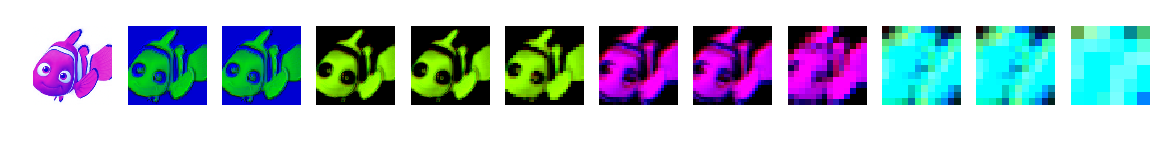

 4  3  0  0  0  0  0  0  0  0  0  4  0  0  4  0  5  3  0  0  4  6  4  3  0  1  5  4  0  0  0  0  0  0  0  0  4  5  7  0  5  3  4  0  0  6  0  0  0  5  0  0  4  0  4  0  4  0  0  0  0  5  3  2  0  4  4  6  4  0  0  0  4  0  5  5  0  0  3  5  3  0  4  3  6  4  0  0  0  0  4  6  4  4  4  0  0  0  0  0  0  0  0  0  0  4  0  0  0  4  0  0  0  0  3  6  0  0  4  5  0  6  4  5  0  4  0  0 

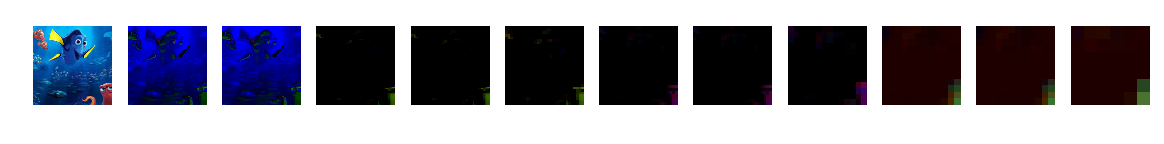

In [7]:
def printfeaturevec(i):
    get = K.function([model.layers[0].input], [model.layers[13].output])
    layer_output = get([imv])[0].tolist()[i]
    feature_vec = [round(n) for n in layer_output]
    for j in range(len(nemotraits)):
        if nemotraits[j]==1:
            print ("\033[91m",feature_vec[j],"\033[0m", end="")
        elif nemotraits[j]==-1:
            print ("\033[94m",feature_vec[j],"\033[0m", end="")
        else:
            print ("\033[0m",feature_vec[j],"\033[0m", end="")

def findbestnemo():
    for i in range(25):
        get = K.function([model.layers[0].input], [model.layers[13].output])
        layer_output = get([imv])[0].tolist()[i]
        feature_vec = [round(n) for n in layer_output]
        for j in range(len(nemotraits)):
            if nemotraits[j]==1:
#                print ("\033[91m",feature_vec[j],"\033[0m", end="")
                nemos[i]+=feature_vec[j]
            elif nemotraits[j]==-1:
#                print ("\033[94m",feature_vec[j],"\033[0m", end="")
                nemos[i]-=feature_vec[j]
#            else:
#                print ("\033[0m",feature_vec[j],"\033[0m", end="")
    bestnemo= nemos.index(max(nemos))+1
    bestdory= nemos.index(min(nemos))+1
    return bestnemo, bestdory

bestnemo, bestdory=findbestnemo()

def plot_layer(fishnr, n):
    fig = plt.figure(figsize=(20,2))
    plt.axis('off')
    sp=fig.add_subplot(1,n+1,1)
    sp.axis('off')        
    plt.imshow(imv_high[fishnr])
    for i in range(n):
        sp=fig.add_subplot(1,n+1,i+2)
        sp.axis('off')        
        get = K.function([model.layers[0].input], [model.layers[i].output])
        layer_output = get([imv])[0].tolist()
        plt.imshow(np.clip(layer_output[fishnr], 0, 1))
    plt.show()
    
plot_layer(bestnemo-1, 11)
printfeaturevec(bestnemo-1)

plot_layer(bestdory-1, 11)
#printfeaturevec(bestdory-1)
#for i in range(25):
#    plot_layer(i, 11)
#plot_layer(4, 11) 

## 5. How the Neural Network finds Nemo

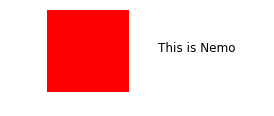

 4  4  0  0  0  0  0  0  0  0  0  5  0  0  5  0  5  4  0  0  4  7  5  4  0  1  6  5  0  0  0  0  0  0  0  0  5  6  8  0  6  4  5  0  0  8  0  0  0  6  0  0  5  0  5  0  6  0  0  0  0  6  4  2  0  4  5  8  5  0  0  0  5  0  6  6  0  0  4  6  4  0  5  3  7  4  0  0  0  0  5  6  4  6  5  0  0  0  0  0  0  0  0  0  0  5  0  0  0  5  0  0  0  0  4  7  1  0  4  6  0  7  5  6  0  5  0  0 

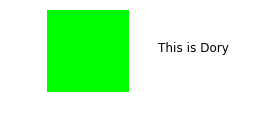

 0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

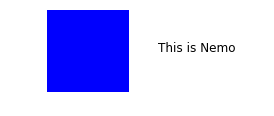

 1  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  1  0  0  1  1  1  1  0  0  1  1  0  0  0  0  0  0  0  0  1  1  2  0  1  1  1  0  0  1  0  0  0  1  0  0  1  0  1  0  1  0  0  0  0  1  1  0  0  1  1  1  1  0  0  0  1  0  1  1  0  0  1  1  1  0  1  1  1  1  0  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  1  1  0  0  1  1  0  1  1  1  0  1  0  0 

In [7]:
# COLOR ANALYSIS

def plot_color(colornr):
    fig = plt.figure(figsize=(4,1.5))
    plt.axis('off')
    sp=fig.add_subplot(1,2,1)
    sp.axis('off')        
    plt.imshow(imv_high[colornr])
    sp=fig.add_subplot(1,2,2)
    sp.axis('off')
    plt.text(0, 0.5, "This is %s%s" %(classes[b[colornr]][:1].upper(),classes[b[colornr]][1:]), fontsize='12')
    plt.show()

for i in range (3):
    plot_color(29+i) 
    printfeaturevec(29+i)

### Explanation
- RED: strongly indicates the presence of Nemo. 
- GREEN: if green is mixed with red, this red does not count.                             
- BLUE: is not very important                                             


## 6. Color Convolutions

In [8]:
#PLOT COLOR CONVOLUTIONS

def colorMatrix(layer):
    A = np.zeros((3, 3))    
    for l in range(3):
        for k in range (3):
            for i in range (3):
                for j in range (3):
                    A[k][l] += model.layers[layer].get_weights()[0][i][j][k][l]
#                    if l==2:
#                        if k==2:
#                            print (model.layers[layer].get_weights()[0][i][j][k][l])
#                            if i==2:
#                                if j==2:
#                                    print (A[k][l])
    return A
A1 = np.round(colorMatrix(0), decimals=1)
print ("\nColor convolution 1 \n", A1)
print ("\nNemo2 ", np.dot([1, 0.4, 0.1], A1))
A2 = colorMatrix(2)
print ("\nC. convolution 2\n", np.round(A2, decimals=1))

A3 = colorMatrix(5)
print ("\nC. convolution 3\n", np.round(A3, decimals=1))

A4 = colorMatrix(8)
print ("\nC. convolution 4\n", np.round(A4, decimals=1))

#print ("Dory2 ", np.dot([0, 0.25, 0.8], A1))



Color convolution 1 
 [[-0.   0.7 -0.5]
 [-0.7 -1.5  0.8]
 [-0.   0.4  0.5]]

Nemo2  [-0.28  0.14 -0.13]

C. convolution 2
 [[-0.5 -0.7  1. ]
 [ 0.8  1.4 -0.3]
 [-0.6 -1.  -0.4]]

C. convolution 3
 [[ 0.1 -0.   1.3]
 [ 0.8 -0.7  0.4]
 [-0.2 -0.1 -0.5]]

C. convolution 4
 [[ 0.7  0.9  0.8]
 [ 0.4  0.4 -0.2]
 [-0.9  0.8  0.7]]


# Why is Nemo Blue???
It is preferable, but not necessary 


 [[ 0.   1.   0. ]
 [ 0.  -1.9  0. ]
 [ 0.   0.   0. ]]


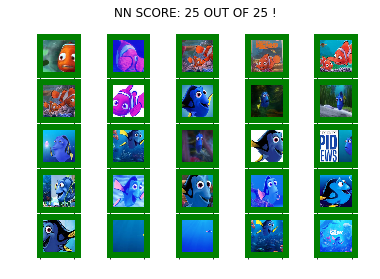

In [9]:
# FIND NEMO IN ONE CONVOLUTION

C = model.layers[0].get_weights()
for i in range(3):
    for j in range(3):
        for k in range(3):
            C[0][i][j][k][2]= 0
            C[0][i][j][k][0]= 0
        C[0][i][j][0][1]= 1/9
        C[0][i][j][1][1]= -1.9/9
        C[0][i][j][2][1]= 0
model.layers[0].set_weights(C)

A1 = np.round(colorMatrix(0), decimals=1)
print ("\n", A1)
plotValResults()
#plot_layer(bestnemo-1, 11)
#plot_layer(bestdory-1, 11)

## The last layer

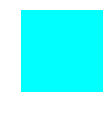

 2.5  2.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.5  0.0  0.0  3.2  0.0  3.5  2.6  0.0  0.0  2.6  4.3  3.2  2.3  0.0  0.4  3.8  3.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.4  3.9  5.1  0.0  3.4  2.3  2.8  0.1  0.0  5.0  0.0  0.0  0.0  3.5  0.0  0.0  3.1  0.0  3.0  0.0  3.6  0.0  0.0  0.0  0.0  3.5  2.3  1.5  0.0  2.4  3.0  4.9  3.0  0.0  0.0  0.0  3.3  0.0  3.8  3.6  0.0  0.0  2.6  3.5  2.4  0.0  2.8  2.1  4.6  2.8  0.0  0.0  0.0  0.0  3.0  4.1  2.8  3.6  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.1  0.0  0.0  0.0  2.9  0.0  0.0  0.0  0.0  2.6  4.5  0.4  0.0  2.8  3.7  0.0  4.5  3.0  3.8  0.0  3.2  0.0  0.0 

In [10]:
# THE LAST LAYER

nr=34
imv2 = []
imv[nr] = resize(imv[nr], 6)
imv2.append(imv[nr])

fig = plt.figure(figsize=(4,1.5))
plt.axis('off')
plt.imshow(imv[nr])
plt.show()
get = K.function([model.layers[11].input], [model.layers[13].output])
layer_output = get([imv2])
layer_output = layer_output[0].tolist()
layer_output = np.round(layer_output, decimals=1)       
    
def colorprint():
    feature_vec = layer_output
    for j in range(len(nemotraits)):
        if nemotraits[j]==1:
            print ("\033[91m",feature_vec[0][j],"\033[0m", end="")
        elif nemotraits[j]==-1:
            print ("\033[94m",feature_vec[0][j],"\033[0m", end="")
        else:
            print ("\033[0m",feature_vec[0][j],"\033[0m", end="")

colorprint()
#last_layer(27)

In [11]:
# V. SALVALA 
#keras.models.save_model(model,"nemo2")

## Image recognition in Real Time

AttributeError: 'NoneType' object has no attribute 'shape'

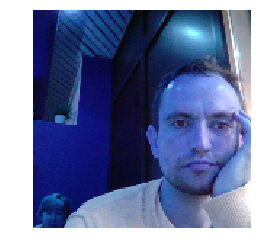

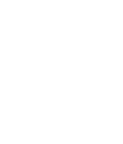

In [12]:
# VI. CODICE PER LA WEBCAM (VERSIONE 1)
j=0
def web_plot(frame, n, hid):
    plt.axis('off')
    plt.imshow(frame)
    frame = resize(frame, 64)
    fig = plt.figure(figsize=(20,2))
    lista = []
    lista.append(frame)

    if True:
        for i in range(n):
            sp2=fig.add_subplot(1,n+1,i+1)
            sp2.axis('off')        
            get = K.function([model.layers[0].input], [model.layers[i].output])
            layer_output = get([lista])[0].tolist()[0]
            plt.imshow(layer_output)
            j=0
    plt.show()
            #temp= plt.text(250, 100, text, fontsize='15', color='red', bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

import cv2

camera = cv2.VideoCapture(0)
frame = [0]*3
lista, a, c = [0], [0], -1
text = " "
plt.axis('off')

while(True):
    try:   
        ret, frame = camera.read()
#        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display.clear_output(wait=True)
        frame = resize(square(frame), 150)
        if j==10:
            hid=True
            j=0
        else:
            hid = False
        web_plot(frame, 11, hid)
        j+=1
#        a = model.predict(np.asarray(lista)).tolist()
#        b = a[0].index(max(a[0]))
        #if b!=c:
        #    temp.remove()
        #    if b==0:
        #        c = b
        #        text="Here is Nemo!"
        #    elif b==1:
        #        c = b
        #        text = "Here is Dory!"
        #    elif b==2:
        #        c = b
        #        text = " "
                

    except KeyboardInterrupt:
        camera.release()


In [ ]:
camera.release()


In [11]:
import numpy as np
import cv2
import skimage
import skimage.viewer
import keras

# USER OPTIONS
model_name="pippo.model"
nc=2
images=[0]*nc
imagessmall=[0]*nc
images[0]= cv2.cvtColor(skimage.io.imread("nemo.jpg"), cv2.COLOR_BGR2RGB)
images[1] = cv2.cvtColor(skimage.io.imread("dory.jpg"), cv2.COLOR_BGR2RGB)
imagessmall[0]=cv2.cvtColor(skimage.io.imread("nemosmall.jpg"), cv2.COLOR_BGR2RGB)
imagessmall[1]=cv2.cvtColor(skimage.io.imread("dorysmall.jpg"), cv2.COLOR_BGR2RGB)
icon = images[0]
# END

print(images[0].shape)
cap = cv2.VideoCapture(0)
model = keras.models.load_model(model_name)

def square(im):
    h, w = im.shape[0:2]
    sz = min(h, w)
    im=im[(h//2-sz//2):(h//2+sz//2),(w//2-sz//2):(w//2+sz//2),:] 
    return im

def resize(im, size):
    im = skimage.transform.resize(im, (size, size, 3), mode='reflect')
    return im

while(True):
    ret, image = cap.read()
    frame = []
    frame.append(resize(square(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), 64))
    a = model.predict(np.asarray(frame)).tolist()
    b = a[0].index(max(a[0]))

# IMAGE ON TOP RIGHT CORNER
    image[10:10+images[b].shape[0],625-images[b].shape[1]:625]=images[b]
    cv2.rectangle(image,(626-images[b].shape[1],10),(626,10+images[b].shape[0]),(0,255,0),3)

# PROBABILITY BARS
    image[10:images[b].shape[0]+30,10:14+24*nc]=np.asarray([[[202]*3 for i in range(4+24*nc)]for j in range(images[b].shape[0]+20)])
    for z in range(nc):
        value=int(a[0][z]*100)+1
        image[114-value:114,14+z*24:34+z*24,0:3]=np.asarray([[[96]*3 for i in range(20)]for j in range(value)])
   
    image[115:144,11:61,0:3]=np.asarray([[[96]*3 for i in range(50)]for j in range(29)])
    image[120:120+imagessmall[0].shape[0],34-imagessmall[0].shape[1]:34]=imagessmall[0]
    image[120:120+imagessmall[1].shape[0],58-imagessmall[1].shape[1]:58]=imagessmall[1]

# CENTRAL FRAME
    image[140:340,240:241,1:2]=np.asarray([[[255]*1 for i in range(1)]for j in range(200)])
    image[140:141,240:440,1:2]=np.asarray([[[255]*1 for i in range(200)]for j in range(1)])
    image[140:340,439:440,1:2]=np.asarray([[[255]*1 for i in range(1)]for j in range(200)])
    image[340:341,240:440,1:2]=np.asarray([[[255]*1 for i in range(200)]for j in range(1)])

    image[140:190,238:242,1:2]=np.asarray([[[255]*1 for i in range(4)]for j in range(50)])    
    image[290:340,238:242,1:2]=np.asarray([[[255]*1 for i in range(4)]for j in range(50)])    
    image[140:190,438:442,1:2]=np.asarray([[[255]*1 for i in range(4)]for j in range(50)])    
    image[290:340,438:442,1:2]=np.asarray([[[255]*1 for i in range(4)]for j in range(50)]) 
    image[138:142,240:290,1:2]=np.asarray([[[255]*1 for i in range(50)]for j in range(4)])    
    image[138:142,390:440,1:2]=np.asarray([[[255]*1 for i in range(50)]for j in range(4)])    
    image[338:342,240:290,1:2]=np.asarray([[[255]*1 for i in range(50)]for j in range(4)])    
    image[338:342,390:440,1:2]=np.asarray([[[255]*1 for i in range(50)]for j in range(4)])    
    
    cv2.imshow('frame',image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(115, 115, 3)


In [2]:
cap.release()
print(int(a[0][0]*100))
print(int(a[0][1]*100))

37
62


In [5]:
import numpy as np
a=np.asarray([[[0]*3 for i in range(20)]for j in range(450)])
print(a.shape)

(450, 20, 3)


In [3]:
http://scikit-image.org/docs/0.13.x/api/skimage.draw.html?highlight=draw#module-skimage.draw 
http://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html 
http://pillow.readthedocs.io/en/3.1.x/reference/ImageDraw.html 
http://effbot.org/imagingbook/imagedraw.htm 

SyntaxError: invalid syntax (<ipython-input-3-29238dd9c240>, line 3)

In [1]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)
#cv2.line(img,(0,0),(511,511),(255,0,0),5)

cv2.imshow('window', img)

